<h1> House Price Prediction <h1>

Proyek ini bertujuan untuk membangun model machine learning yang dapat memprediksi harga jual rumah (SalePrice) berdasarkan berbagai fitur yang tersedia dalam dataset. Proses ini mencakup beberapa tahapan penting, mulai dari pembersihan data, feature engineering, feature selection, hingga melatih dan mengevaluasi dua model regresi yang berbeda: Linear Regression dan Random Forest Regressor.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/MachineLearning/HousePrice/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/MachineLearning/HousePrice/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# EDA

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
print("Jumlah duplikasi: ", train_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
missing_data = train_df.isna().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(ascending=False, inplace=True)
missing_data

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [ ]:
#drop kolom yang missing valuesnya besar
train_df = train_df.drop(columns=['Alley'])
train_df = train_df.drop(columns=['PoolQC'])
train_df = train_df.drop(columns=['Fence'])
train_df = train_df.drop(columns=['MiscFeature'])

In [ ]:
numerical_cols = train_df.select_dtypes(include=['number']).columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

for col in numerical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())

for col in categorical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le

train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


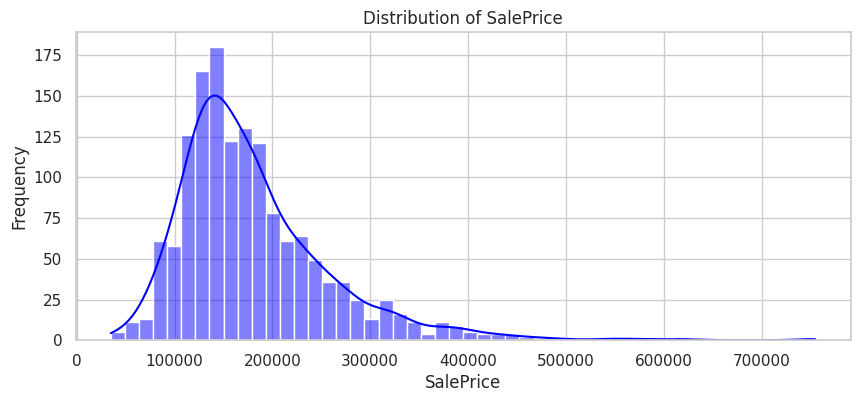

In [ ]:
#checking SalePrice distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.histplot(train_df.SalePrice, kde=True, color='blue', bins=50)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Without Tuning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

model = LinearRegression()

rfe = RFE(model, n_features_to_select=20)
X_rfe = rfe.fit_transform(X, y)

selected_features = X.columns[rfe.support_]
print("Selected features using RFE:\n", selected_features)

Selected features using RFE:
 Index(['Street', 'Utilities', 'LandSlope', 'BldgType', 'OverallQual',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'BsmtQual', 'CentralAir',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'PavedDrive'],
      dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 1399625819.5279925
Root Mean Squared Error (RMSE): 37411.57333670949
R-squared: 0.7994257647607773
Mean Absolute Error (MAE): 25349.740709169262


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=10, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

print(f"Best Hyperparameters After Tuning: {grid_search_rf.best_params_}")

best_rf_model = grid_search_rf.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"After Tuning - Mean Squared Error (MSE): {mse_rf}")
print(f"After Tuning - Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"After Tuning - R-squared: {r2_rf}")
print(f"After Tuning - Mean Absolute Error (MAE): {mae_rf}")


Best Hyperparameters After Tuning: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
After Tuning - Mean Squared Error (MSE): 1191221637.5651758
After Tuning - Root Mean Squared Error (RMSE): 34514.07883118389
After Tuning - R-squared: 0.8292912536897716
After Tuning - Mean Absolute Error (MAE): 23025.810510975705


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

feature_importance

,Feature,Coefficient
2,LandSlope,20221.150805
10,BsmtFullBath,18633.017257
4,OverallQual,16786.750778
18,GarageCars,16174.963542
0,Street,15620.781788
12,FullBath,14477.349059
9,CentralAir,12690.726987
17,Fireplaces,11796.930793
16,TotRmsAbvGrd,7538.895949
11,BsmtHalfBath,5305.461533


# Prediction

Linear Regression Model - Train Data - Mean Squared Error (MSE): 1202501937.2351665
Linear Regression Model - Train Data - Root Mean Squared Error (RMSE): 34677.109701288064
Linear Regression Model - Train Data - R-squared: 0.8002015686857457
Linear Regression Model - Train Data - Mean Absolute Error (MAE): 22710.388996306865


Linear Regression Model - Test Data - Mean Squared Error (MSE): 1399625819.5279925
Linear Regression Model - Test Data - Root Mean Squared Error (RMSE): 37411.57333670949
Linear Regression Model - Test Data - R-squared: 0.7994257647607773
Linear Regression Model - Test Data - Mean Absolute Error (MAE): 25349.740709169262


Random Forest Model - Train Data - Mean Squared Error (MSE): 464397176.5006145
Random Forest Model - Train Data - Root Mean Squared Error (RMSE): 21549.876484579083
Random Forest Model - Train Data - R-squared: 0.9228393531033072
Random Forest Model - Train Data - Mean Absolute Error (MAE): 14278.929079428712


Random Forest Model - Test Data 

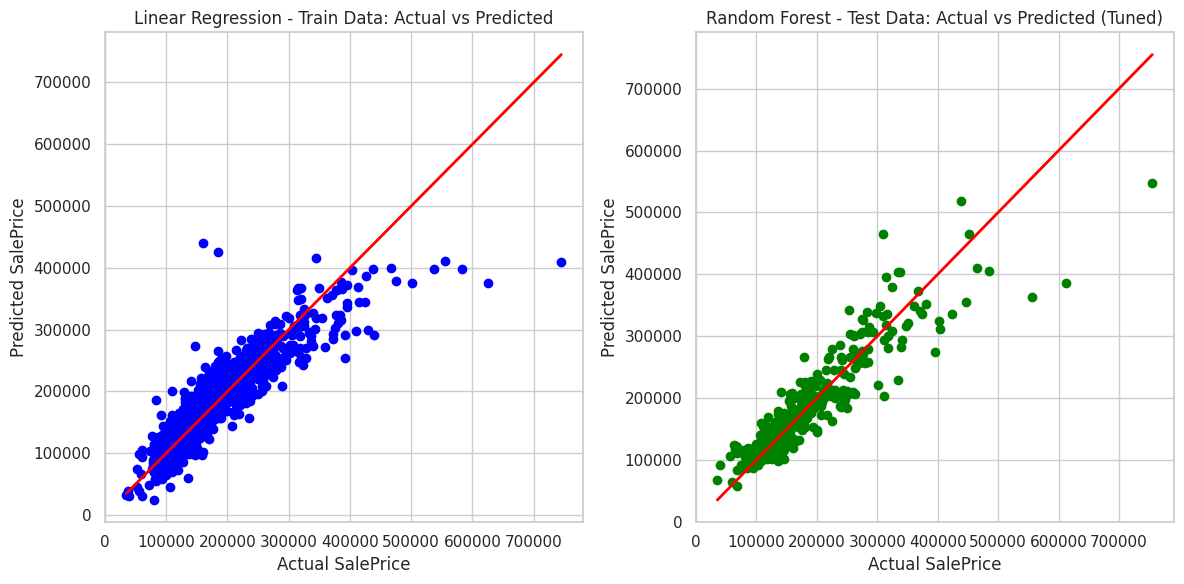

In [ ]:
model.fit(X_train, y_train)

#without tuning
y_pred_train_lr = model.predict(X_train)
y_pred_test_lr = model.predict(X_test)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)

print(f"Linear Regression Model - Train Data - Mean Squared Error (MSE): {mse_train_lr}")
print(f"Linear Regression Model - Train Data - Root Mean Squared Error (RMSE): {rmse_train_lr}")
print(f"Linear Regression Model - Train Data - R-squared: {r2_train_lr}")
print(f"Linear Regression Model - Train Data - Mean Absolute Error (MAE): {mae_train_lr}")
print("\n")
print(f"Linear Regression Model - Test Data - Mean Squared Error (MSE): {mse_test_lr}")
print(f"Linear Regression Model - Test Data - Root Mean Squared Error (RMSE): {rmse_test_lr}")
print(f"Linear Regression Model - Test Data - R-squared: {r2_test_lr}")
print(f"Linear Regression Model - Test Data - Mean Absolute Error (MAE): {mae_test_lr}")
print("\n")

# with tuning
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)

mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)

# Print the evaluation results for Random Forest (after tuning)
print(f"Random Forest Model - Train Data - Mean Squared Error (MSE): {mse_train_rf}")
print(f"Random Forest Model - Train Data - Root Mean Squared Error (RMSE): {rmse_train_rf}")
print(f"Random Forest Model - Train Data - R-squared: {r2_train_rf}")
print(f"Random Forest Model - Train Data - Mean Absolute Error (MAE): {mae_train_rf}")
print("\n")
print(f"Random Forest Model - Test Data - Mean Squared Error (MSE): {mse_test_rf}")
print(f"Random Forest Model - Test Data - Root Mean Squared Error (RMSE): {rmse_test_rf}")
print(f"Random Forest Model - Test Data - R-squared: {r2_test_rf}")
print(f"Random Forest Model - Test Data - Mean Absolute Error (MAE): {mae_test_rf}")
print("\n")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_lr, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linewidth=2)
plt.title('Linear Regression - Train Data: Actual vs Predicted')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Random Forest - Test Data: Actual vs Predicted (Tuned)')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')

plt.tight_layout()
plt.show()



Dari penjelasan di atas kita bisa lihat bawah error yang dimiliki training masih lebih kecil daripada testing namun jaraknya tidak terlalu jauh.

Untuk scatter plot, jika titik semakin dekat dengan garis merah menandakan semakin akurat. Pada data ini terdapat 2 cara untuk mendapatkan prediction, yaitu dengan tuning dan tanpa tuning. Seharusnya jika menurut ke-4 Evaluation Model yang sudah digunakan Random Forest yang sudah di Tuning menghasilkan output yang lebih baik dari pada sebelum di tuning.

Namun pada scatter plot menunjukkan bahwa data output yang dihasilkan sebaliknya, data yang dihasilkan linear regression biasa menghasilkan output yang lebih optimal, sedangkan output yang dihasilkan random forest yang di tuning lebih wide-spread